<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-DataSet" data-toc-modified-id="Import-DataSet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import DataSet</a></span></li><li><span><a href="#DataSet-Analysis" data-toc-modified-id="DataSet-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DataSet Analysis</a></span><ul class="toc-item"><li><span><a href="#Creating-numeric-and-caatagorical-DataFrame" data-toc-modified-id="Creating-numeric-and-caatagorical-DataFrame-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creating numeric and caatagorical DataFrame</a></span></li><li><span><a href="#Analyzing-Numerical-Value" data-toc-modified-id="Analyzing-Numerical-Value-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analyzing Numerical Value</a></span><ul class="toc-item"><li><span><a href="#Checking-Null-value-in-DataFrame" data-toc-modified-id="Checking-Null-value-in-DataFrame-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Checking Null value in DataFrame</a></span></li><li><span><a href="#Finding-out-the-correlation-in-numerical-dataset" data-toc-modified-id="Finding-out-the-correlation-in-numerical-dataset-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Finding out the correlation in numerical dataset</a></span></li><li><span><a href="#Data-Sepeartion" data-toc-modified-id="Data-Sepeartion-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Data Sepeartion</a></span></li><li><span><a href="#Outlier-detection-and-correction" data-toc-modified-id="Outlier-detection-and-correction-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Outlier detection and correction</a></span></li><li><span><a href="#Outlier-Index" data-toc-modified-id="Outlier-Index-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Outlier Index</a></span></li><li><span><a href="#Standard-Scaling" data-toc-modified-id="Standard-Scaling-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Standard Scaling</a></span></li></ul></li><li><span><a href="#Analyzing-Catagorical-Value" data-toc-modified-id="Analyzing-Catagorical-Value-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Analyzing Catagorical Value</a></span><ul class="toc-item"><li><span><a href="#Data-Filtering" data-toc-modified-id="Data-Filtering-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Data Filtering</a></span></li><li><span><a href="#Label-Encoding" data-toc-modified-id="Label-Encoding-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Label Encoding</a></span></li><li><span><a href="#Concatinating-Numerical-and-Catagorical-Value" data-toc-modified-id="Concatinating-Numerical-and-Catagorical-Value-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Concatinating Numerical and Catagorical Value</a></span></li></ul></li></ul></li><li><span><a href="#Selcting-K-Best-value" data-toc-modified-id="Selcting-K-Best-value-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Selcting K Best value</a></span></li><li><span><a href="#Training-And-Testing" data-toc-modified-id="Training-And-Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training And Testing</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import numpy as np

# Import DataSet

In [2]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# DataSet Analysis

In [3]:
df.shape

(6362620, 11)

In [4]:
print('Number of zero in isFlaggedFraud : ',df[df['isFlaggedFraud']==0].shape)
print('Number of zero in isFraud : ',df[df['isFraud']==0].shape)

Number of zero in isFlaggedFraud :  (6362604, 11)
Number of zero in isFraud :  (6354407, 11)


In [5]:
print('Number of zero in isFlaggedFraud : ',df[df['isFlaggedFraud']==1].shape)
print('Number of zero in isFraud : ',df[df['isFraud']==1].shape)

Number of zero in isFlaggedFraud :  (16, 11)
Number of zero in isFraud :  (8213, 11)


## Creating numeric and caatagorical DataFrame

In [6]:
df_num = pd.DataFrame()
df_cat = pd.DataFrame()

In [7]:
for i in df.columns:
    if df[i].dtype == object:
        df_cat[i] = df[i]
    else:
        df_num[i] = df[i]

In [8]:
df_cat.head()

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703


In [28]:
df_num.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


## Analyzing Numerical Value

### Checking Null value in DataFrame

type        0
nameOrig    0
nameDest    0
dtype: int64


<AxesSubplot:>

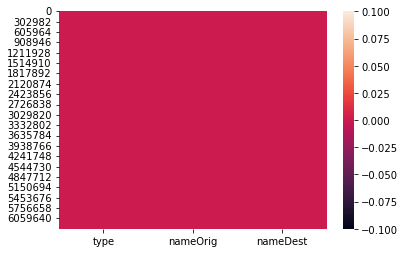

In [10]:
print(df_cat.isnull().sum())
snb.heatmap(df_cat.isnull())

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


<AxesSubplot:>

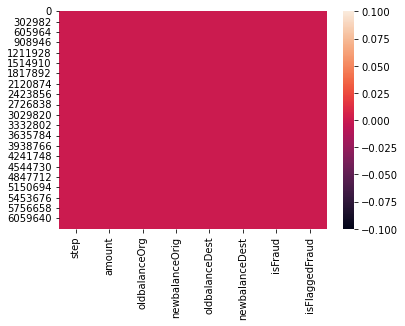

In [11]:
print(df_num.isnull().sum())
snb.heatmap(df_num.isnull())

### Finding out the correlation in numerical dataset

<AxesSubplot:>

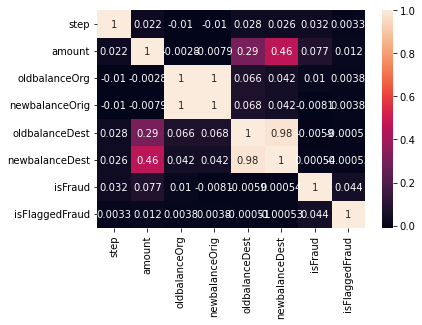

In [12]:
cr = df_num.corr()
snb.heatmap(cr,annot=True)

### Data Sepeartion

In [13]:
inputs = df_num.drop(['isFlaggedFraud','isFraud'],axis='columns')
inputs.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0


In [14]:
target = df_num['isFraud']
target.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

### Outlier detection and correction

In [15]:
def outlier(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    lst = df.index[(df[ft]<lower)|df[ft]>upper]
    
    mean = df[ft].mean()
    for i in lst:
        df[ft].loc[i] = mean
    return lst

### Outlier Index

In [16]:
df_lst = []
for i in inputs.columns:
    df_lst.extend(outlier(inputs,i))
df_lst

[]

In [17]:
inputs.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0


### Standard Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [19]:
df_tf = pd.DataFrame()
df_tf = scale.fit_transform(inputs)
df_tf

array([[-1.70304158e+00, -2.81559923e-01, -2.29810037e-01,
        -2.37621696e-01, -3.23813895e-01, -3.33411405e-01],
       [-1.70304158e+00, -2.94767262e-01, -2.81359380e-01,
        -2.85812295e-01, -3.23813895e-01, -3.33411405e-01],
       [-1.70304158e+00, -2.97554804e-01, -2.88653782e-01,
        -2.92441707e-01, -3.23813895e-01, -3.33411405e-01],
       ...,
       [ 3.51012348e+00,  1.01539526e+01,  1.89649113e+00,
        -2.92441707e-01, -3.03665258e-01,  1.40302700e+00],
       [ 3.51012348e+00,  1.10976490e+00,  5.58104668e-03,
        -2.92441707e-01, -3.23813895e-01, -3.33411405e-01],
       [ 3.51012348e+00,  1.10976490e+00,  5.58104668e-03,
        -2.92441707e-01,  1.59138312e+00,  1.66981230e+00]])

## Analyzing Catagorical Value

In [27]:
df_cat.head()

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703


### Data Filtering

In [29]:
cat_input = df_cat.drop(['nameOrig','nameDest'],axis='columns')
cat_input.head()

,type
0,PAYMENT
1,PAYMENT
2,TRANSFER
3,CASH_OUT
4,PAYMENT


### Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
cat_input['type'] = le.fit_transform(cat_input['type'])
cat_input.head()

,type
0,3
1,3
2,4
3,1
4,3


### Concatinating Numerical and Catagorical Value

In [33]:
inputs = pd.concat([inputs,cat_input],axis='columns')
inputs.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type
0,1,9839.64,170136.0,160296.36,0.0,0.0,3
1,1,1864.28,21249.0,19384.72,0.0,0.0,3
2,1,181.00,181.0,0.00,0.0,0.0,4
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,3


# Selcting K Best value

In [20]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

In [21]:
# df_x = SelectKBest(chi2,10).fit_transform(inputs,target)

# Training And Testing

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(inputs,target,test_size=0.3,random_state=10)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [37]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [38]:
model.score(xtest,ytest)

0.9982449577899252